<a href="https://colab.research.google.com/github/rajasharma87437-maker/INTERSNSHIP-TASK-1/blob/main/internship_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2990569195.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette="Set2")


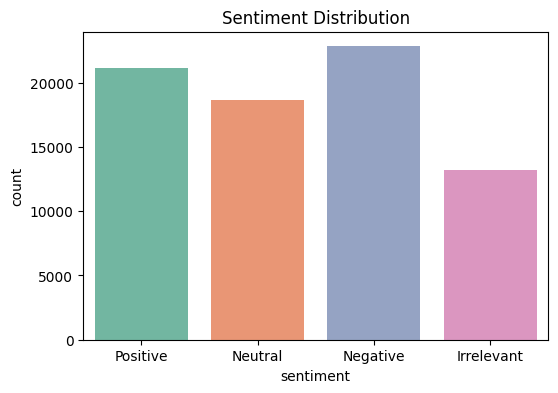

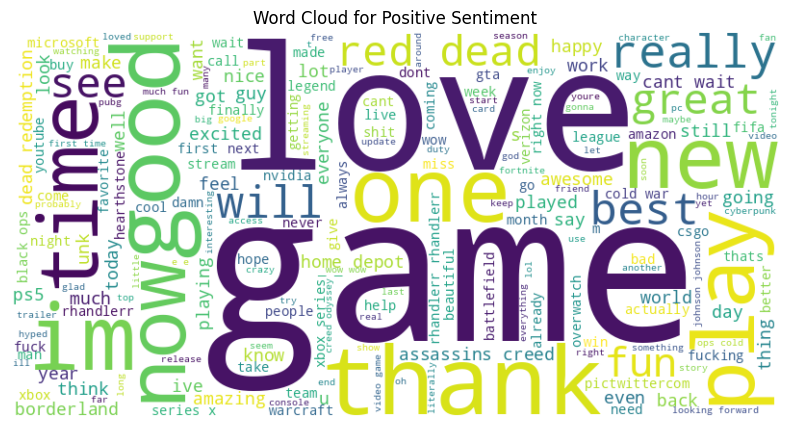

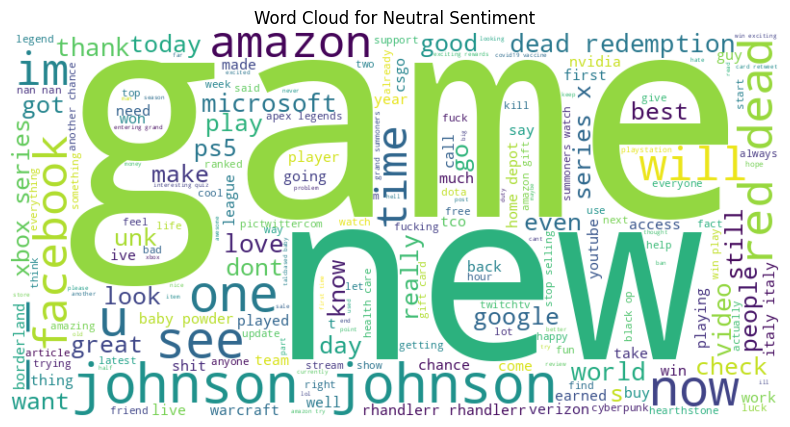

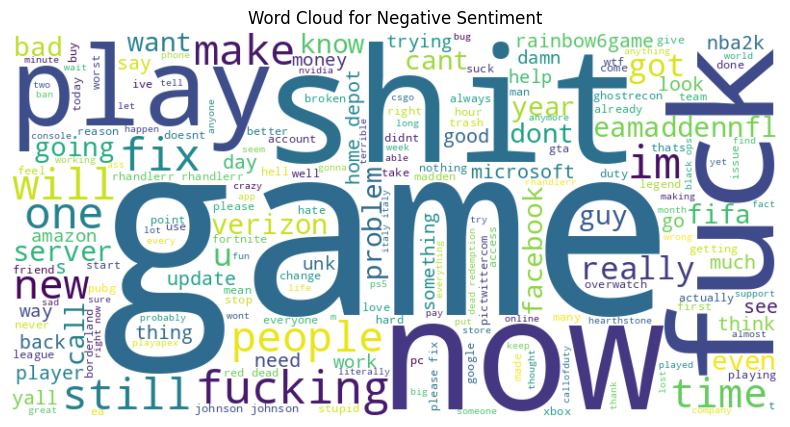

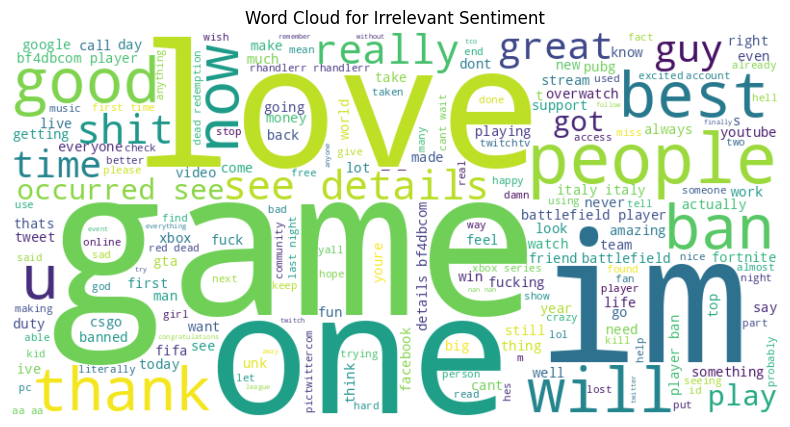


Accuracy: 0.744599326154456

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.83      0.62      0.71      2567
    Negative       0.72      0.85      0.78      4571
     Neutral       0.81      0.63      0.71      3790
    Positive       0.70      0.81      0.75      4209

    accuracy                           0.74     15137
   macro avg       0.76      0.73      0.74     15137
weighted avg       0.75      0.74      0.74     15137



In [ ]:
# Prodigy Infotech Internship - Task 04
# Sentiment Analysis on Twitter Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load Dataset (Fixed URLs)
cols = ["sentiment", "text"]
train_url = "https://raw.githubusercontent.com/chriswilder3/PRODIGY-DS-04/main/twitter_training.csv"
valid_url = "https://raw.githubusercontent.com/chriswilder3/PRODIGY-DS-04/main/twitter_validation.csv"

df_train = pd.read_csv(train_url, names=cols, header=None)
df_valid = pd.read_csv(valid_url, names=cols, header=None)

# Combine training and validation datasets
df = pd.concat([df_train, df_valid], ignore_index=True)

# Step 2: Clean Text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Step 3: Visualize Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

# Step 4: Generate Word Clouds
for sentiment in df['sentiment'].unique():
    words = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()

# Step 5: Vectorization
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

# Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 8: Predict and Evaluate
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))